In [4]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [5]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

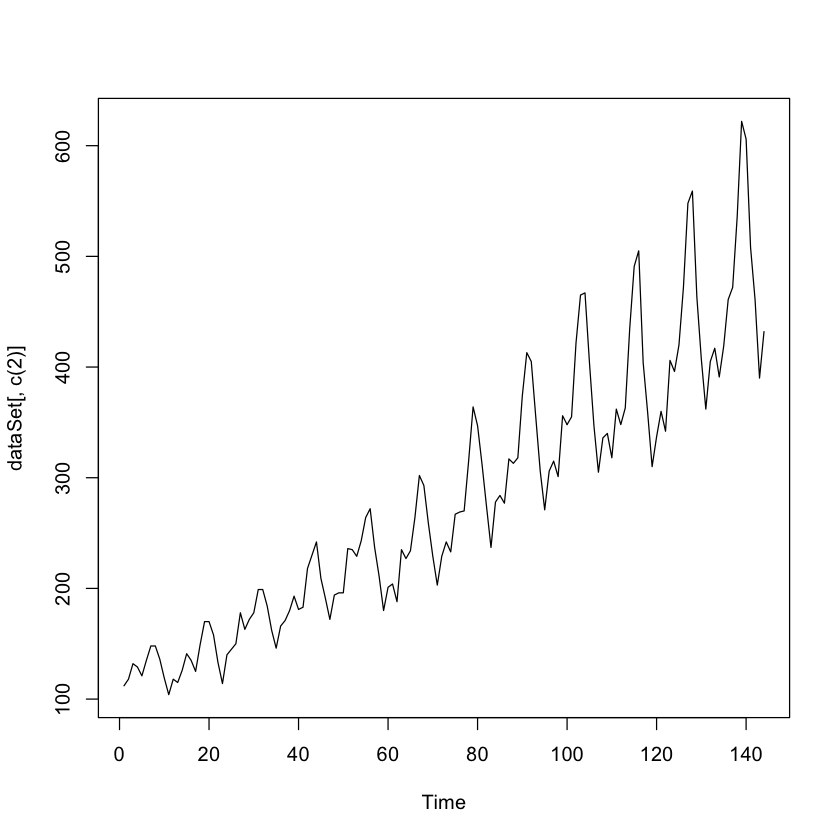

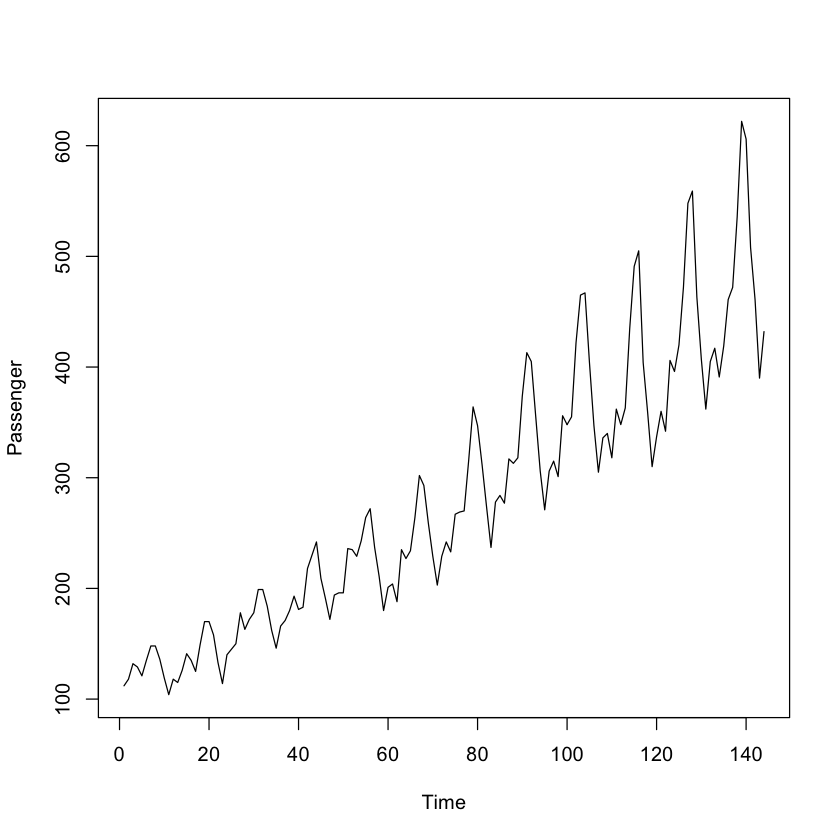

In [6]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [7]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

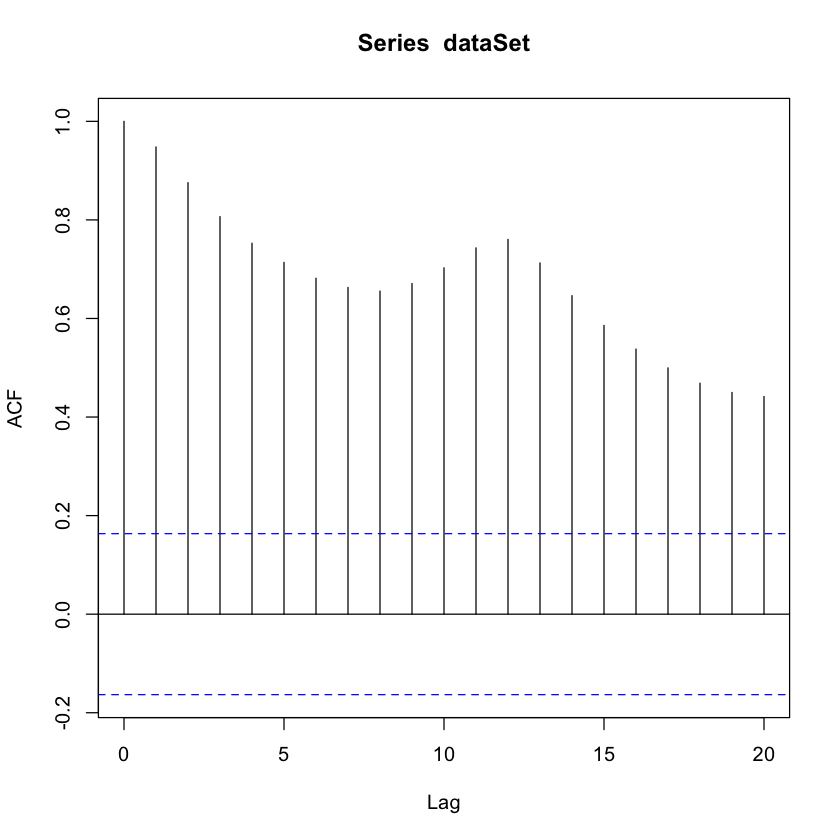

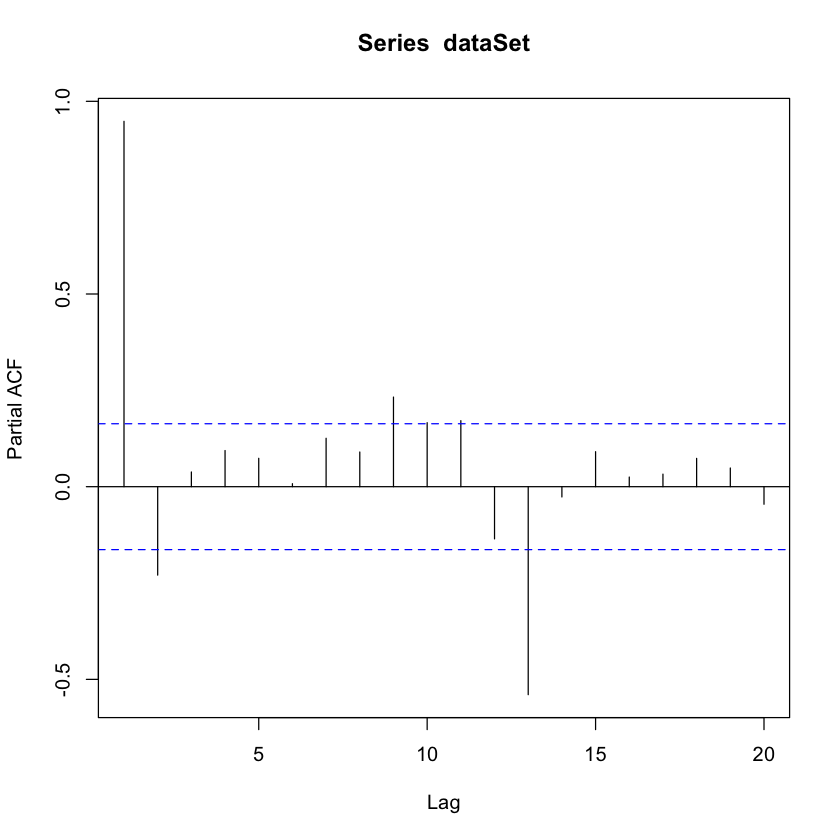

In [8]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  


	Ljung-Box test

data:  Residuals from ARIMA(0,2,1)
Q* = 61.717, df = 9, p-value = 6.25e-10

Model df: 1.   Total lags used: 10

[1] 0.9231674


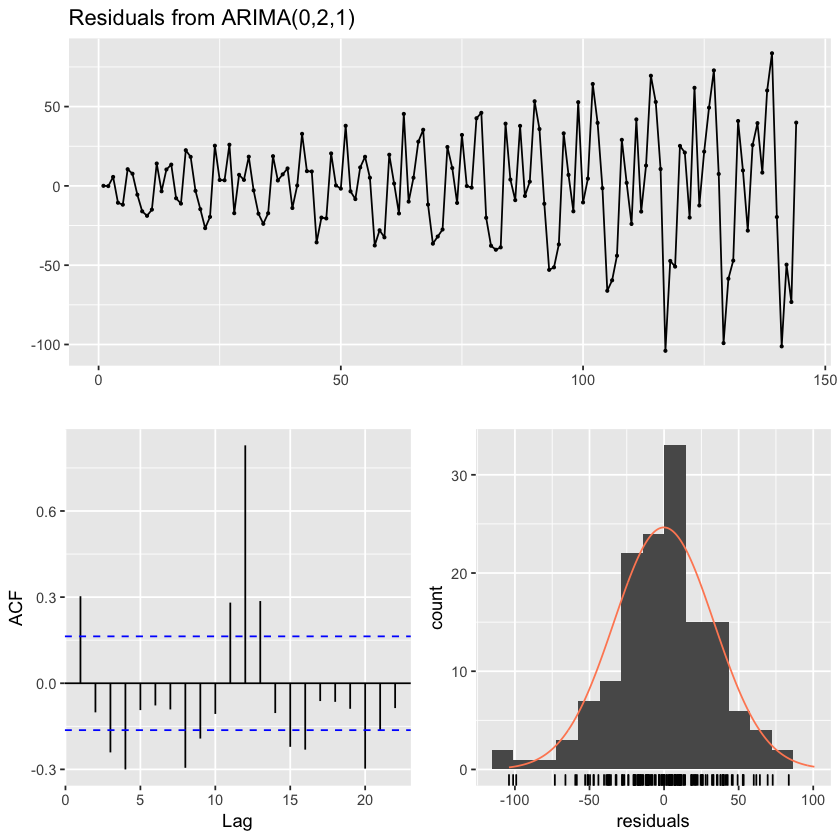

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       434.2378 390.8289 477.6466 367.8497 500.6259
146       436.4755 374.8734 498.0777 342.2632 530.6879
147       438.7133 363.0066 514.4199 322.9300 554.4966
148       440.9511 353.2337 528.6684 306.7989 575.1032
149       443.1888 344.7848 541.5928 292.6929 593.6848
150       445.4266 337.2668 553.5863 280.0105 610.8427
151       447.6644 330.4471 564.8816 268.3960 626.9327
152       449.9021 324.1746 575.6297 257.6184 642.1858
153       452.1399 318.3448 585.9349 247.5180 656.7617
154       454.3776 312.8821 595.8732 237.9789 670.7764
155       456.6154 307.7295 605.5013 228.9140 684.3168
156       458.8532 302.8428 614.8635 220.2559 697.4504
157       461.0909 298.1873 623.9946 211.9512 710.2306
158       463.3287 293.7346 632.9228 203.9569 722.7005
159       465.5665 289.4617 641.6712 196.2375 734.8955
160       467.8042 285.3493 650.2591 188.7636 746.8449
161       470.0420 281.3813 658.7027 181.5104 758.5736
162       

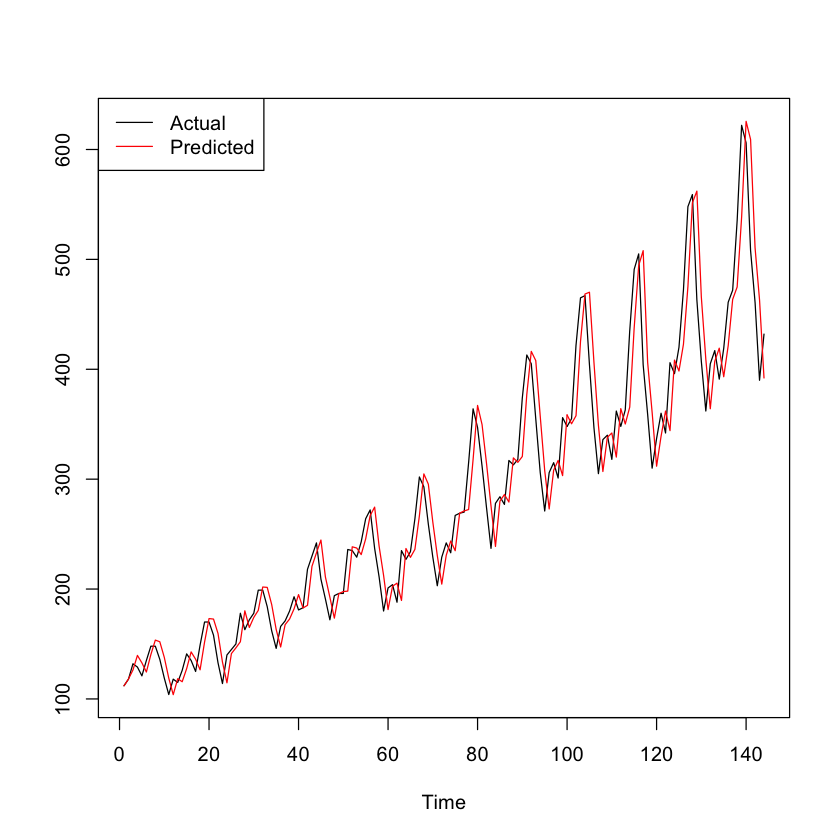

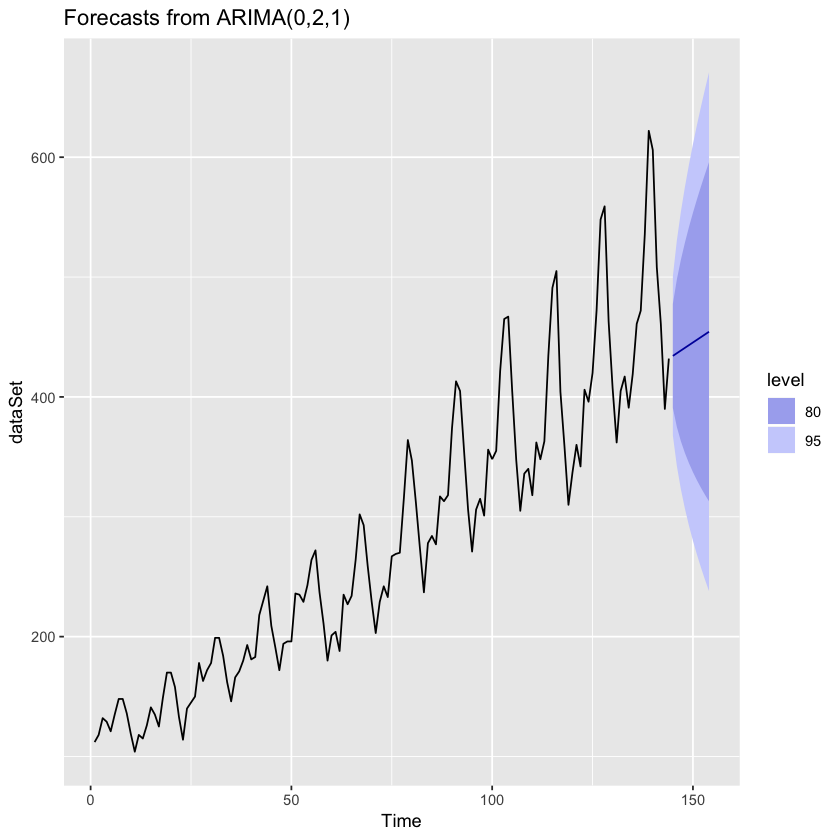

In [9]:
# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(0,2,1)); checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 22)
print(forecast); autoplot(forecast(fit_arima))